#1 Linear Regression on Time Series Data

##Question-1

1. [2 points] Time Series Exploration : Try to understand the time series dataset uploaded along with the exercise. This involves (but is not limited to) plotting the multivariate time series (time on x-axis)
clearly labelled and formatted, understanding how the multivariate time series interacts, understanding the correlation between the different variables, plots for variable density functions, identifying inherent
seasonality or trend etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Projects/Jeevitha/9-Time Series Data/time_series.csv')

In [ ]:
df.head()

,date,X1,X2,X3,X4,X5,X6,Y
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    17420 non-null  object 
 1   X1      17420 non-null  float64
 2   X2      17420 non-null  float64
 3   X3      17420 non-null  float64
 4   X4      17420 non-null  float64
 5   X5      17420 non-null  float64
 6   X6      17420 non-null  float64
 7   Y       17420 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [ ]:
df['new_time'] = df.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

###Task-1-plotting the multivariate time series (time on x-axis) clearly labelled and formatted

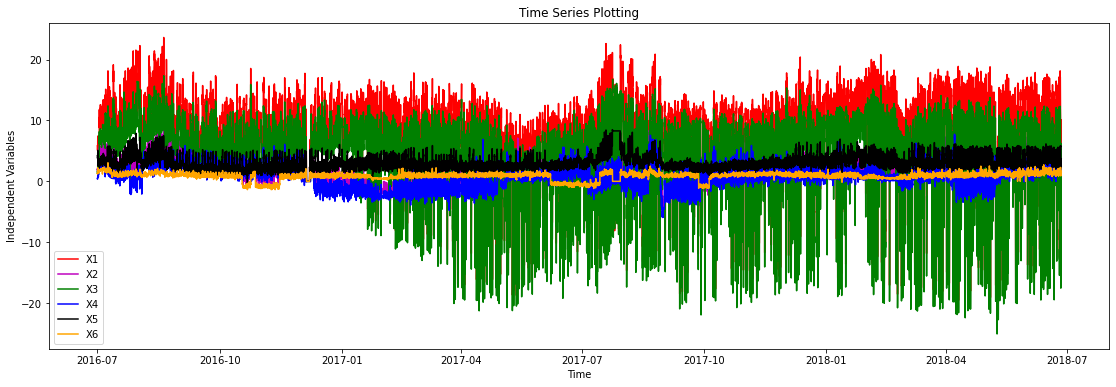

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(df.new_time,df.X1,'r',label='X1')
plt.plot(df.new_time,df.X2,'m',label='X2')
plt.plot(df.new_time,df.X3,'g',label='X3')
plt.plot(df.new_time,df.X4,'b',label='X4')
plt.plot(df.new_time,df.X5,'black',label='X5')
plt.plot(df.new_time,df.X6,'orange',label='X6')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Independent Variables')
plt.title('Time Series Plotting');

###Task-2-understanding how the multivariate time series interacts

In [ ]:
d = datetime.strptime("2016-08-01 00:00:00", "%Y-%m-%d %H:%M:%S")

In [ ]:
df2 = df[df['new_time']<d]

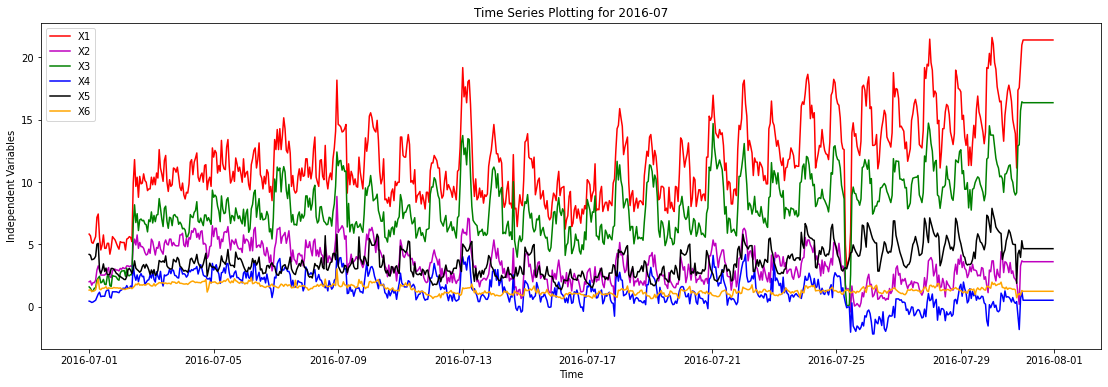

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(df2.new_time,df2.X1,'r',label='X1')
plt.plot(df2.new_time,df2.X2,'m',label='X2')
plt.plot(df2.new_time,df2.X3,'g',label='X3')
plt.plot(df2.new_time,df2.X4,'b',label='X4')
plt.plot(df2.new_time,df2.X5,'black',label='X5')
plt.plot(df2.new_time,df2.X6,'orange',label='X6')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Independent Variables')
plt.title('Time Series Plotting for 2016-07');

###Task-3- understanding the correlation between the different variables

In [ ]:
df3 = df.drop(['date','new_time'],axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.114672,0.987355,0.066002,0.291418,0.023606,0.059916
X2,0.114672,1.000000,0.068817,0.930491,0.259487,0.377641,0.224354
X3,0.987355,0.068817,1.000000,0.046266,0.177491,-0.046519,0.050854
X4,0.066002,0.930491,0.046266,1.000000,0.128607,0.069419,0.220004
X5,0.291418,0.259487,0.177491,0.128607,1.000000,0.334563,0.118836
X6,0.023606,0.377641,-0.046519,0.069419,0.334563,1.000000,0.067455
Y,0.059916,0.224354,0.050854,0.220004,0.118836,0.067455,1.000000


###Task-4-plots for variable density functions

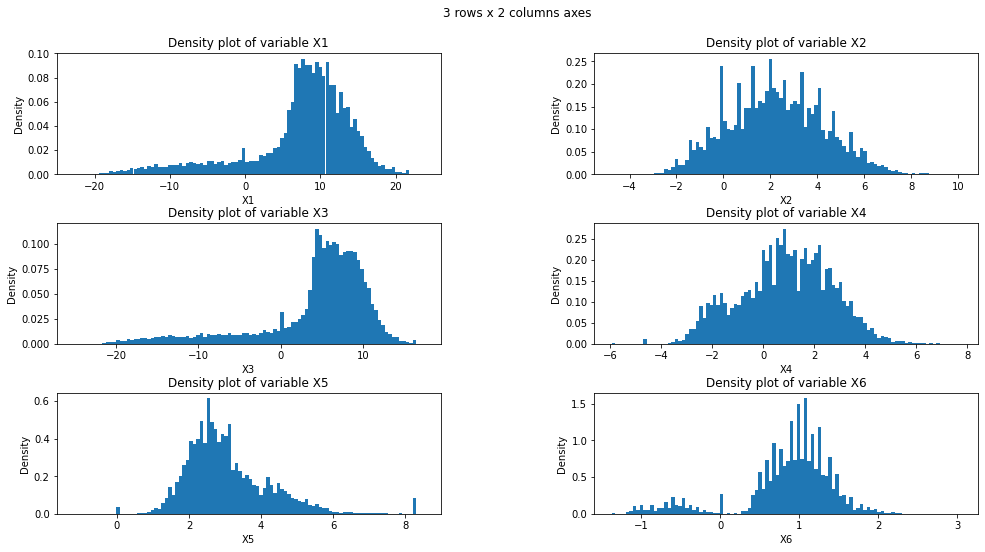

In [ ]:
xaxes = ['X1','X2','X3','X4','X5','X6']
n_bins = 100

fig, axes = plt.subplots(3, 2, figsize=(16,8))
axes = axes.ravel()

fig.suptitle('3 rows x 2 columns axes')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

for idx,ax in enumerate(axes):
    title = "Density plot of variable " + str(xaxes[idx])
    ax.hist(df[xaxes[idx]], n_bins, density = True, histtype ='bar')
    ax.set_title(title)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel('Density')


###Task-5- identifying inherent seasonality or trend etc.

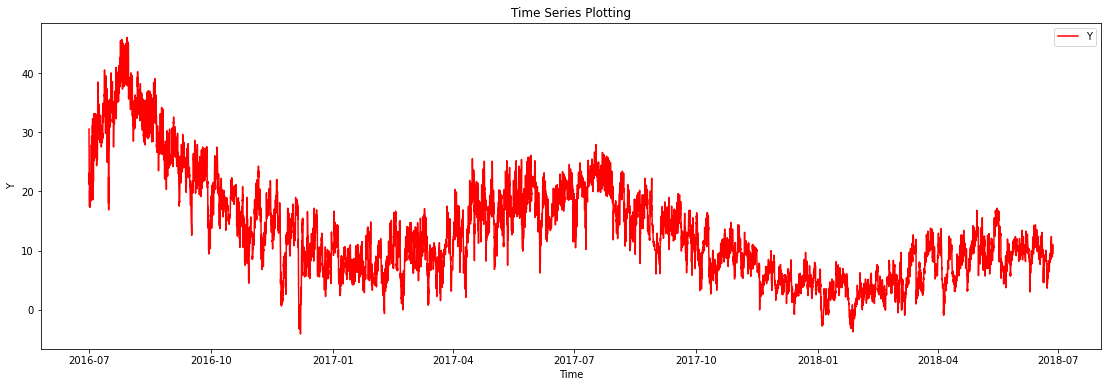

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(df.new_time,df.Y,'r',label='Y')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Time Series Plotting');

##Question-2

2. [1.5 points] Train/Test split : As a next step, try to split the data into train, validation and test by considering the following rules</br>
a) train end : 2017-06-26</br>
b) val end : 2017-10-24</br>
c) test end : 2018-02-21</br>
Draw a single plot of the entire time series (for the target variable) and mark clearly within the plot, the train end, the val end and the test end.
From now on, you are working with the train, test and validation dataset.

In [ ]:
train = df[df['new_time']<datetime.strptime("2017-06-26 00:00:00", "%Y-%m-%d %H:%M:%S")]
val = df[(df['new_time']>datetime.strptime("2017-06-26 00:00:00", "%Y-%m-%d %H:%M:%S")) & (df['new_time']<datetime.strptime("2017-10-24 00:00:00", "%Y-%m-%d %H:%M:%S"))]
test = df[(df['new_time']>datetime.strptime("2017-10-24 00:00:00", "%Y-%m-%d %H:%M:%S")) & (df['new_time']<datetime.strptime("2018-02-21 00:00:00", "%Y-%m-%d %H:%M:%S"))]

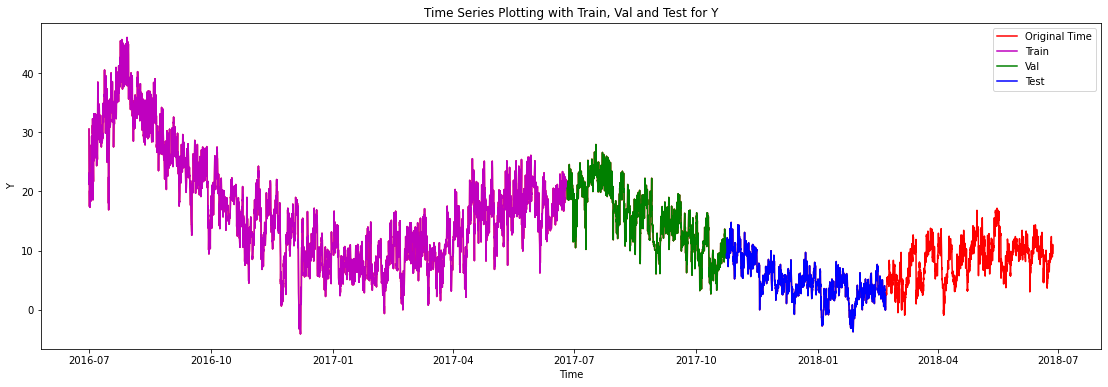

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(df.new_time,df.Y,'r',label='Original Time')
plt.plot(train.new_time,train.Y,'m',label='Train')
plt.plot(val.new_time,val.Y,'g',label='Val')
plt.plot(test.new_time,test.Y,'b',label='Test')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Y')
plt.title('Time Series Plotting with Train, Val and Test for Y');

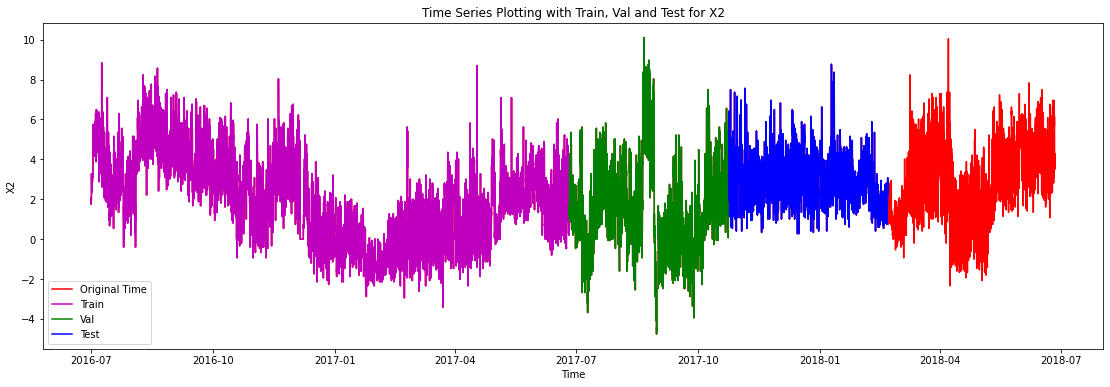

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(df.new_time,df.X2,'r',label='Original Time')
plt.plot(train.new_time,train.X2,'m',label='Train')
plt.plot(val.new_time,val.X2,'g',label='Val')
plt.plot(test.new_time,test.X2,'b',label='Test')

plt.legend()
plt.xlabel('Time')
plt.ylabel('X2')
plt.title('Time Series Plotting with Train, Val and Test for X2');

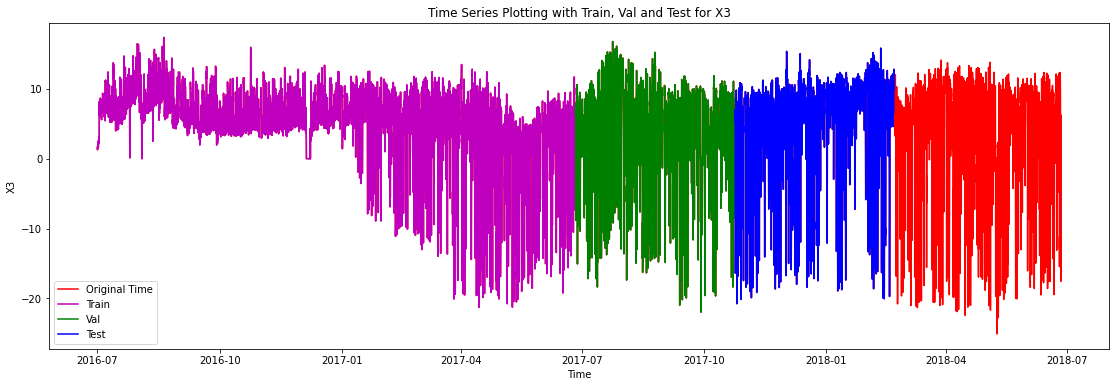

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(df.new_time,df.X3,'r',label='Original Time')
plt.plot(train.new_time,train.X3,'m',label='Train')
plt.plot(val.new_time,val.X3,'g',label='Val')
plt.plot(test.new_time,test.X3,'b',label='Test')

plt.legend()
plt.xlabel('Time')
plt.ylabel('X3')
plt.title('Time Series Plotting with Train, Val and Test for X3');

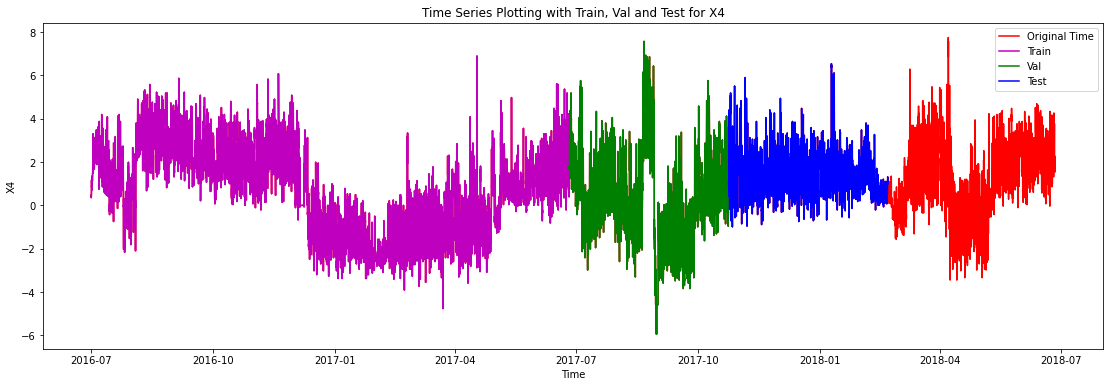

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(df.new_time,df.X4,'r',label='Original Time')
plt.plot(train.new_time,train.X4,'m',label='Train')
plt.plot(val.new_time,val.X4,'g',label='Val')
plt.plot(test.new_time,test.X4,'b',label='Test')

plt.legend()
plt.xlabel('Time')
plt.ylabel('X4')
plt.title('Time Series Plotting with Train, Val and Test for X4');

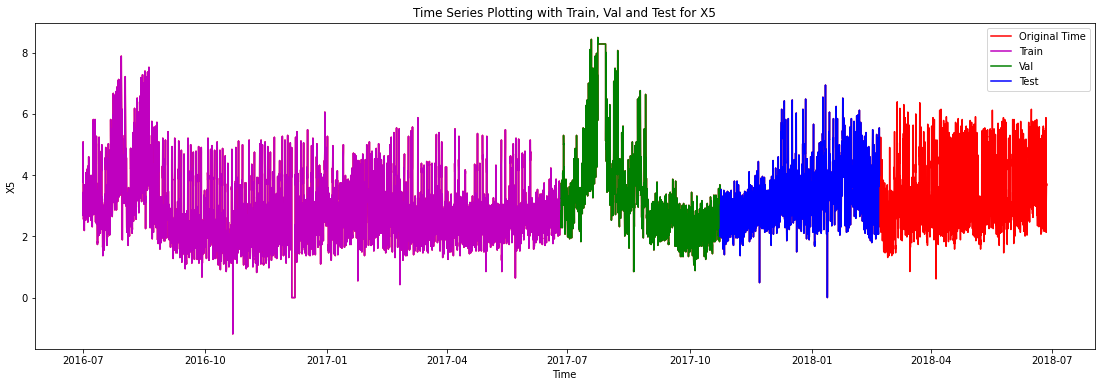

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(df.new_time,df.X5,'r',label='Original Time')
plt.plot(train.new_time,train.X5,'m',label='Train')
plt.plot(val.new_time,val.X5,'g',label='Val')
plt.plot(test.new_time,test.X5,'b',label='Test')

plt.legend()
plt.xlabel('Time')
plt.ylabel('X5')
plt.title('Time Series Plotting with Train, Val and Test for X5');

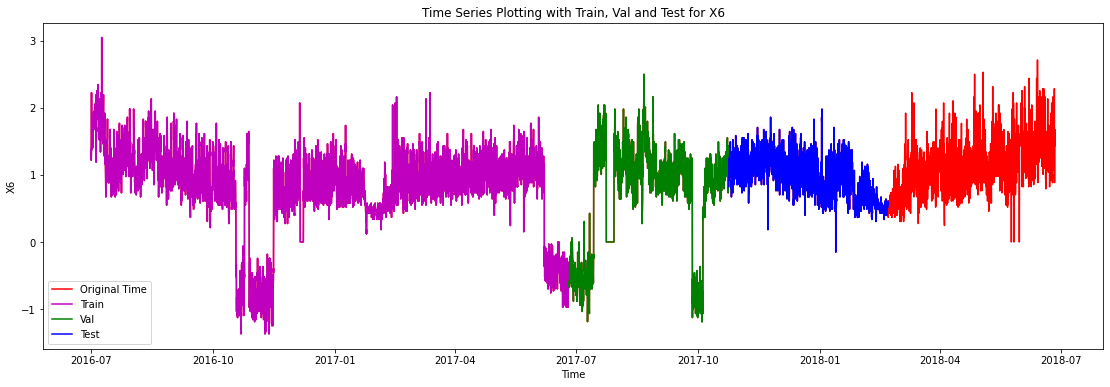

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(df.new_time,df.X6,'r',label='Original Time')
plt.plot(train.new_time,train.X6,'m',label='Train')
plt.plot(val.new_time,val.X6,'g',label='Val')
plt.plot(test.new_time,test.X6,'b',label='Test')

plt.legend()
plt.xlabel('Time')
plt.ylabel('X6')
plt.title('Time Series Plotting with Train, Val and Test for X6');

##Question-3

3. [1.5 point] Scaling data: For each of these datasets perform a standard scaling to scale each variable independently i.e.,</br>

             z = (x − mean(x)) / std(x)

Check if the standard scaling worked by computing the mean and standard deviation for a particular variable within the data.


In [ ]:
train3 = train.copy()
test3 = test.copy()
val3 = val.copy()

In [ ]:
train3.loc[:,'X1'] = train.X1.apply(lambda x: (x-np.mean(train.X1))/np.std(train.X1))
train3.loc[:,'X2'] = train.X2.apply(lambda x: (x-np.mean(train.X2))/np.std(train.X2))
train3.loc[:,'X3'] = train.X3.apply(lambda x: (x-np.mean(train.X3))/np.std(train.X3))
train3.loc[:,'X4'] = train.X4.apply(lambda x: (x-np.mean(train.X4))/np.std(train.X4))
train3.loc[:,'X5'] = train.X5.apply(lambda x: (x-np.mean(train.X5))/np.std(train.X5))
train3.loc[:,'X6'] = train.X6.apply(lambda x: (x-np.mean(train.X6))/np.std(train.X6))

In [ ]:
xaxes = ['X1','X2','X3','X4','X5','X6']
for x in xaxes:
  print("For variable ",x," mean = ",np.mean(train3[x])," and standard deviation = ",np.std(train3[x]))

For variable  X1  mean =  6.579099405186112e-17  and standard deviation =  1.0
For variable  X2  mean =  -8.059396771352989e-17  and standard deviation =  1.0
For variable  X3  mean =  1.118446898881639e-16  and standard deviation =  1.0
For variable  X4  mean =  6.579099405186113e-18  and standard deviation =  1.0
For variable  X5  mean =  -1.155454333035811e-16  and standard deviation =  0.9999999999999998
For variable  X6  mean =  -1.7105658453483893e-16  and standard deviation =  1.0


In [ ]:
test3['X1'] = test.X1.apply(lambda x: (x-np.mean(test.X1))/np.std(test.X1))
test3['X2'] = test.X2.apply(lambda x: (x-np.mean(test.X2))/np.std(test.X2))
test3['X3'] = test.X3.apply(lambda x: (x-np.mean(test.X3))/np.std(test.X3))
test3['X4'] = test.X4.apply(lambda x: (x-np.mean(test.X4))/np.std(test.X4))
test3['X5'] = test.X5.apply(lambda x: (x-np.mean(test.X5))/np.std(test.X5))
test3['X6'] = test.X6.apply(lambda x: (x-np.mean(test.X6))/np.std(test.X6))

In [ ]:
xaxes = ['X1','X2','X3','X4','X5','X6']
for x in xaxes:
  print("For variable ",x," mean = ",np.mean(test3[x])," and standard deviation = ",np.std(test3[x]))

For variable  X1  mean =  1.1846492294715112e-16  and standard deviation =  1.0
For variable  X2  mean =  -3.948830764905037e-17  and standard deviation =  1.0
For variable  X3  mean =  3.948830764905037e-17  and standard deviation =  1.0
For variable  X4  mean =  1.480811536839389e-17  and standard deviation =  1.0
For variable  X5  mean =  -1.579532305962015e-16  and standard deviation =  1.0
For variable  X6  mean =  1.1846492294715112e-16  and standard deviation =  0.9999999999999999


In [ ]:
val3['X1'] = val.X1.apply(lambda x: (x-np.mean(val.X1))/np.std(val.X1))
val3['X2'] = val.X2.apply(lambda x: (x-np.mean(val.X2))/np.std(val.X2))
val3['X3'] = val.X3.apply(lambda x: (x-np.mean(val.X3))/np.std(val.X3))
val3['X4'] = val.X4.apply(lambda x: (x-np.mean(val.X4))/np.std(val.X4))
val3['X5'] = val.X5.apply(lambda x: (x-np.mean(val.X5))/np.std(val.X5))
val3['X6'] = val.X6.apply(lambda x: (x-np.mean(val.X6))/np.std(val.X6))

In [ ]:
xaxes = ['X1','X2','X3','X4','X5','X6']
for x in xaxes:
  print("For variable ",x," mean = ",np.mean(val3[x])," and standard deviation = ",np.std(val3[x]))

For variable  X1  mean =  0.0  and standard deviation =  1.0
For variable  X2  mean =  2.961623073678778e-17  and standard deviation =  0.9999999999999998
For variable  X3  mean =  -3.948830764905037e-17  and standard deviation =  0.9999999999999999
For variable  X4  mean =  3.948830764905037e-17  and standard deviation =  1.0
For variable  X5  mean =  -1.1846492294715112e-16  and standard deviation =  1.0
For variable  X6  mean =  -3.948830764905037e-17  and standard deviation =  0.9999999999999999


##Question-4

4. [6 points] Regression : Next, implement learn a linear regression model using Normal Equations using the algorithm below.</br>

&emsp;learn-linreg-NormEq(Dtrain := {(x1, y1), . . . ,(xN , yN )}) :</br>
&emsp;&emsp; X := (x1, x2, . . . , xN )<sup>T</sup></br>
&emsp;&emsp; y := (y1, y2, . . . , yN )<sup>T</sup></br>
&emsp;&emsp; A := X<sup>T</sup> X</br>
&emsp;&emsp; b := X<sup>T</sup>y</br>
&emsp;&emsp; βˆ := solve-SLE(A, b)</br>
&emsp;&emsp; return βˆ</br>
For solving the Linear Equations (the function solve-SLE), use</br>
a) Gaussian Elimination (implemented in pure python i.e., only numpy)</br>
b) QR decomposition (implemented in pure python i.e., only numpy)

###a) Gaussian Elimination (implemented in pure python i.e., only numpy)

In [ ]:
X_train = np.array(train[['X1','X2','X3','X4','X5','X6']])
ones_col = np.repeat(np.array([[1]]),repeats=X_train.shape[0],axis=0)
X_train = np.append(ones_col,X_train,axis=1)
y_train = np.array(train[['Y']])

X_val = np.array(val[['X1','X2','X3','X4','X5','X6']])
ones_col = np.repeat(np.array([[1]]),repeats=X_val.shape[0],axis=0)
X_val = np.append(ones_col,X_val,axis=1)
y_val = np.array(val[['Y']])

X_test = np.array(test[['X1','X2','X3','X4','X5','X6']])
ones_col = np.repeat(np.array([[1]]),repeats=X_test.shape[0],axis=0)
X_test = np.append(ones_col,X_test,axis=1)
y_test= np.array(test[['Y']])

In [ ]:
# Creating a function to perform gaussian elimination on the given matrix mat  
def gauss_elem(mat,n):  
    num = len(mat)  
  
    for i in range(0, num):  
        # Searching the maximum value of a particular column  
        max_el = abs(mat[i][i])  
        # Row having the element of maximum value  
        max_row = i  
        for k in range(i + 1, num):  
            if abs(mat[k][i]) > max_el:  
                max_el = abs(mat[k][i])  
                max_row = k  
  
        # Swapping the maximum row with the current row   
        for k in range(i, n + 1):  
            temp = mat[max_row][k]  
            mat[max_row][k] = mat[i][k]  
            mat[i][k] = temp  
  
        # Chaning the value of the rows below the current row to 0   
        for k in range(i + 1, n):  
            curr = -mat[k][i] / mat[i][i]  
            for j in range(i, n + 1):  
                if i == j:  
                    mat[k][j] = 0  
                else:  
                    mat[k][j] += curr * mat[i][j]  
  
    # Solving the equation Ax = b for the created upper triangular matrix mat  
    l = [0 for i in range(n)]  
    for j in range(n - 1, -1, -1):  
        l[j] = mat[j][n] / mat[j][j]  
        for k in range(j - 1, -1, -1):  
            mat[k][n] -= mat[k][j] * l[j]  
    return l  

In [ ]:
# Python program to find a solution to a set of linear equations using the Gaussian Elimination method  
if __name__ == "__main__":    
    n = 7
    X = X_train
    y = y_train

    A = X.T @ X
    b = X.T @ y
    A_mat = np.append(A, b, axis=1)   
    # Calculating the solution of the matrix  
    beta_bar = gauss_elem(A_mat,n)  
    beta_bar = np.array(beta_bar).reshape(n,1)
    print(beta_bar)   

[[7.70443647e+00]
 [6.89385805e-04]
 [1.00413187e+00]
 [2.27903728e-02]
 [1.46124209e+00]
 [1.61069572e+00]
 [2.15899062e+00]]


In [ ]:
y_bar_train = X_train @ beta_bar
N = y_bar_train.shape[0]
MSE = np.sum((y_train-y_bar_train)**2)/N
MAE = np.sum(np.absolute((y_train-y_bar_train)))/N
print("MSE for train dataset = ",MSE)
print("MAE for train dataset = ",MAE)
print()

y_bar_val = X_val @ beta_bar
N = y_bar_val.shape[0]
MSE = np.sum((y_val-y_bar_val)**2)/N
MAE = np.sum(np.absolute((y_val-y_bar_val)))/N
print("MSE for val dataset = ",MSE)
print("MAE for val dataset = ",MAE)
print()

y_bar_test = X_test @ beta_bar
N = y_bar_test.shape[0]
MSE = np.sum((y_test-y_bar_test)**2)/N
MAE = np.sum(np.absolute((y_test-y_bar_test)))/N
print("MSE for test dataset = ",MSE)
print("MAE for test dataset = ",MAE)

MSE for train dataset =  50.60504586336988
MAE for train dataset =  5.459702773149315

MSE for val dataset =  47.23676396009717
MAE for val dataset =  5.400828074107728

MSE for test dataset =  262.8926673412904
MAE for test dataset =  15.471809628201543


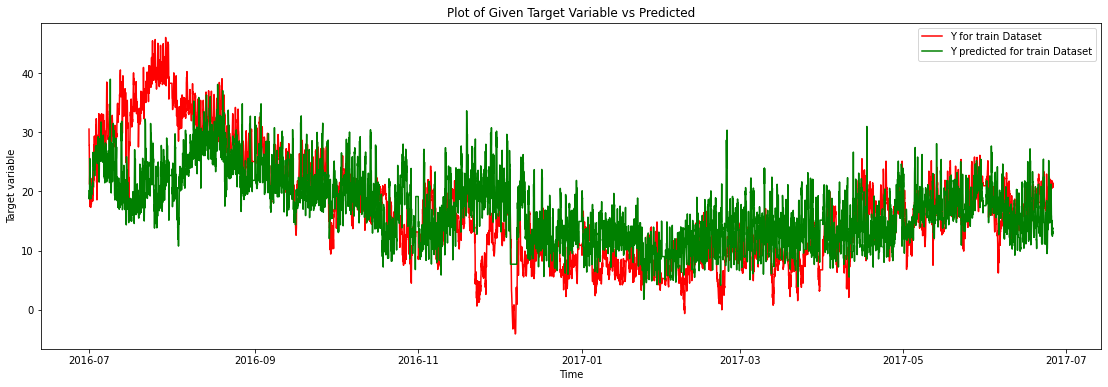

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(train.new_time,y_train,'r',label = 'Y for train Dataset')
plt.plot(train.new_time,y_bar_train,'g',label = 'Y predicted for train Dataset')

plt.title("Plot of Given Target Variable vs Predicted")
plt.xlabel("Time")
plt.ylabel("Target variable")
plt.legend()
plt.show()

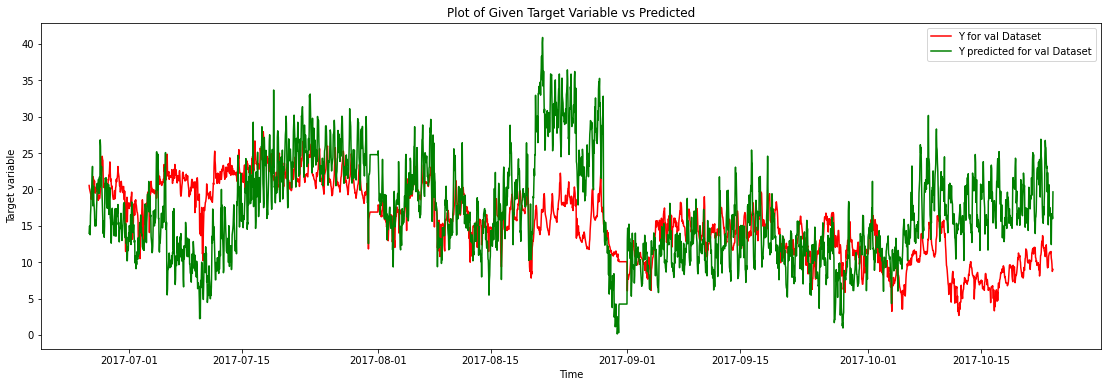

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(val.new_time,y_val,'r',label = 'Y for val Dataset')
plt.plot(val.new_time,y_bar_val,'g',label = 'Y predicted for val Dataset')

plt.title("Plot of Given Target Variable vs Predicted")
plt.xlabel("Time")
plt.ylabel("Target variable")
plt.legend()
plt.show()

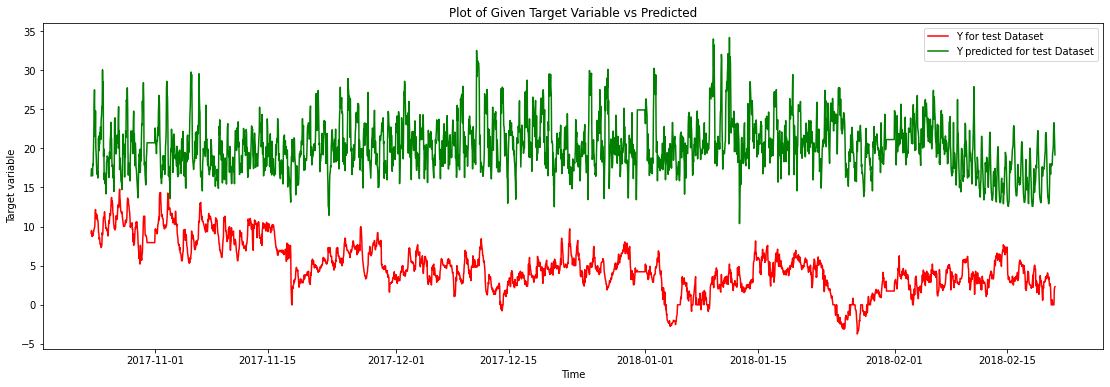

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(test.new_time,y_test,'r',label = 'Y for test Dataset')
plt.plot(test.new_time,y_bar_test,'g',label = 'Y predicted for test Dataset')

plt.title("Plot of Given Target Variable vs Predicted")
plt.xlabel("Time")
plt.ylabel("Target variable")
plt.legend()
plt.show()

###b) QR decomposition (implemented in pure python i.e., only numpy)

In [ ]:
def QR_Decomposition(A):
    n, m = A.shape # get the shape of A

    Q = np.empty((n, n)) # initialize matrix Q
    u = np.empty((n, n)) # initialize matrix u

    u[:, 0] = A[:, 0]
    Q[:, 0] = u[:, 0] / np.linalg.norm(u[:, 0])

    for i in range(1, n):

        u[:, i] = A[:, i]
        for j in range(i):
            u[:, i] -= (A[:, i] @ Q[:, j]) * Q[:, j] # get each u vector

        Q[:, i] = u[:, i] / np.linalg.norm(u[:, i]) # compute each e vetor

    R = np.zeros((n, m))
    for i in range(n):
        for j in range(i, m):
            R[i, j] = A[:, j] @ Q[:, i]

    
    D = np.diag(np.sign(np.diag(Q)))
    Q[:, :] = Q @ D
    R[:, :] = D @ R

    Q = -Q
    R = -R

    return Q, R


In [ ]:
def BackSubstitution(U,B):
# =============================================================================
#     U is a NumPy array that represents an upper triangular square mxm matrix.  
#     B is a NumPy array that represents an mx1 vector     
#     BackSubstitution will return an mx1 vector that is the solution of the
#     system UX=B.
# =============================================================================
    m = U.shape[0]  # m is number of rows and columns in U
    X = np.zeros((m,1))
    
    for i in range(m-1,-1,-1):  # Calculate entries of X backward from m-1 to 0
        X[i] = B[i]
        for j in range(i+1,m):
            X[i] -= U[i][j]*X[j]
        if (U[i][i] != 0):
            X[i] /= U[i][i]
        else:
            print("Zero entry found in U pivot position",i,".")
    return X

In [ ]:
# Python program to find a solution to a set of linear equations using the Gaussian Elimination method  
if __name__ == "__main__":    
    n = 7
    X = X_train
    y = y_train

    A = X.T @ X
    b = X.T @ y
    A_mat = np.append(A, b, axis=1)   

    # Calculating the solution of the matrix  
    Q,R = QR_Decomposition(A_mat)
    C = Q.T @ b
    beta_bar = BackSubstitution(R,C)

    beta_bar = np.array(beta_bar).reshape(n,1)
    print(beta_bar)   

[[7.70443647e+00]
 [6.89385946e-04]
 [1.00413187e+00]
 [2.27903727e-02]
 [1.46124209e+00]
 [1.61069572e+00]
 [2.15899062e+00]]


In [ ]:
y_bar_train = X_train @ beta_bar
N = y_bar_train.shape[0]
MSE = np.sum((y_train-y_bar_train)**2)/N
MAE = np.sum(np.absolute((y_train-y_bar_train)))/N
print("MSE for train dataset = ",MSE)
print("MAE for train dataset = ",MAE)
print()

y_bar_val = X_val @ beta_bar
N = y_bar_val.shape[0]
MSE = np.sum((y_val-y_bar_val)**2)/N
MAE = np.sum(np.absolute((y_val-y_bar_val)))/N
print("MSE for val dataset = ",MSE)
print("MAE for val dataset = ",MAE)
print()

y_bar_test = X_test @ beta_bar
N = y_bar_test.shape[0]
MSE = np.sum((y_test-y_bar_test)**2)/N
MAE = np.sum(np.absolute((y_test-y_bar_test)))/N
print("MSE for test dataset = ",MSE)
print("MAE for test dataset = ",MAE)

MSE for train dataset =  50.605045863369874
MAE for train dataset =  5.459702773148963

MSE for val dataset =  47.236763959806964
MAE for val dataset =  5.400828074070868

MSE for test dataset =  262.89266734097043
MAE for test dataset =  15.471809628197178


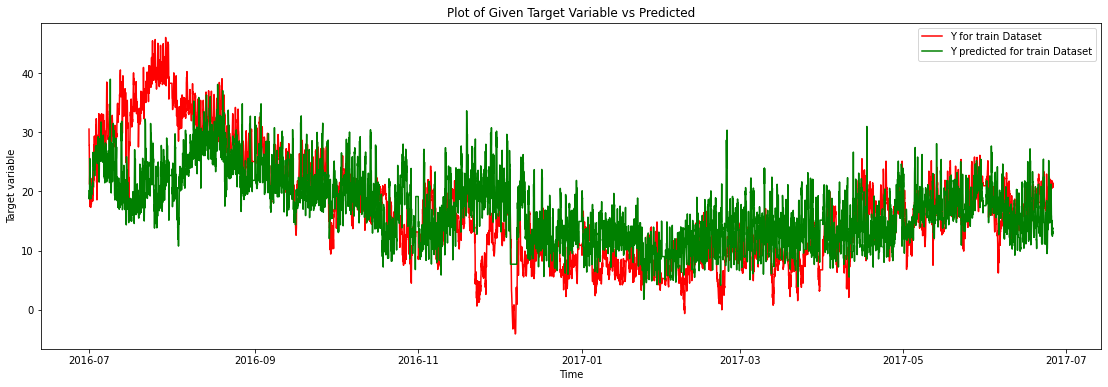

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(train.new_time,y_train,'r',label = 'Y for train Dataset')
plt.plot(train.new_time,y_bar_train,'g',label = 'Y predicted for train Dataset')

plt.title("Plot of Given Target Variable vs Predicted")
plt.xlabel("Time")
plt.ylabel("Target variable")
plt.legend()
plt.show()

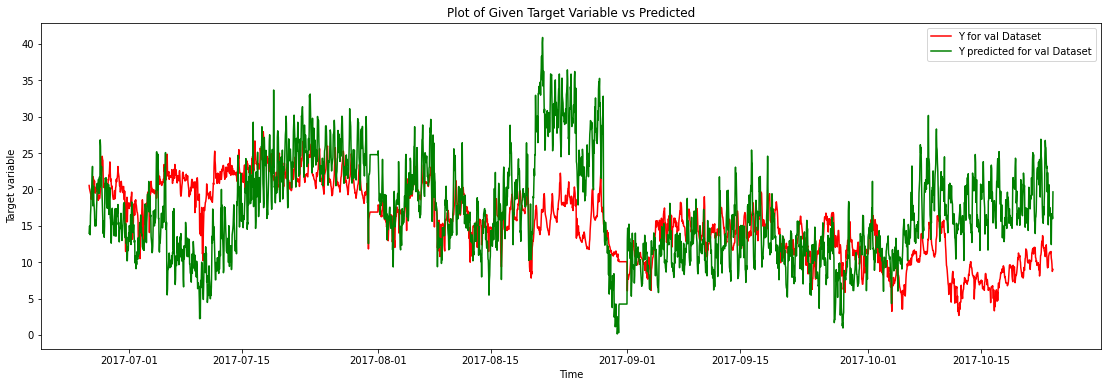

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(val.new_time,y_val,'r',label = 'Y for val Dataset')
plt.plot(val.new_time,y_bar_val,'g',label = 'Y predicted for val Dataset')

plt.title("Plot of Given Target Variable vs Predicted")
plt.xlabel("Time")
plt.ylabel("Target variable")
plt.legend()
plt.show()

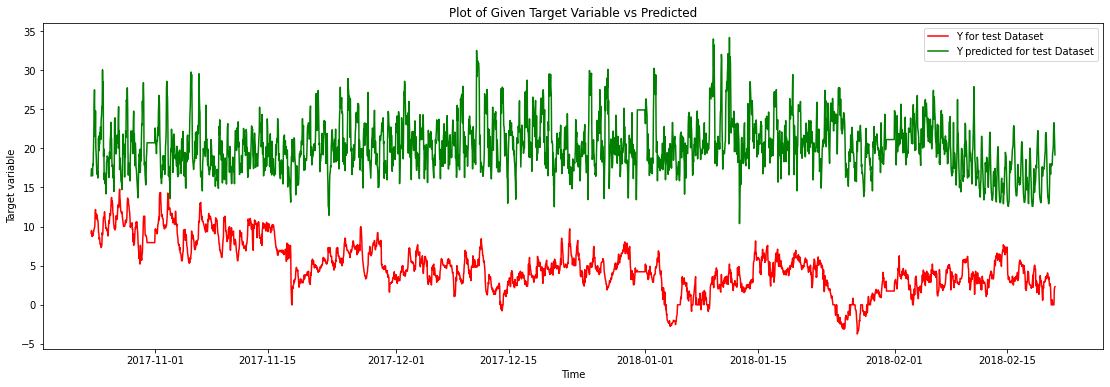

In [ ]:
plt.figure(figsize=(19,6)) 
plt.plot(test.new_time,y_test,'r',label = 'Y for test Dataset')
plt.plot(test.new_time,y_bar_test,'g',label = 'Y predicted for test Dataset')

plt.title("Plot of Given Target Variable vs Predicted")
plt.xlabel("Time")
plt.ylabel("Target variable")
plt.legend()
plt.show()

#2 Gradient Descent and Step Length Controller

In this part, you are required to optimize the booth function using gradient descent. The Figure below provides a visual representation of the booth function in a 3D plot

Mathematically, the function can be defined as follows.
f(x, y) = (x + 2y)<sup>2</sup> + (2x + y − 5)<sup>2</sup>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

##1. [1 point] Implement a 3D plot to visualize the function (Use Matplotlib’s 3D utilities)

In [4]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = (X + 2*Y)**2 + (2*X + Y - 5)**2
Z = np.log(np.exp(X)+np.exp(Y))

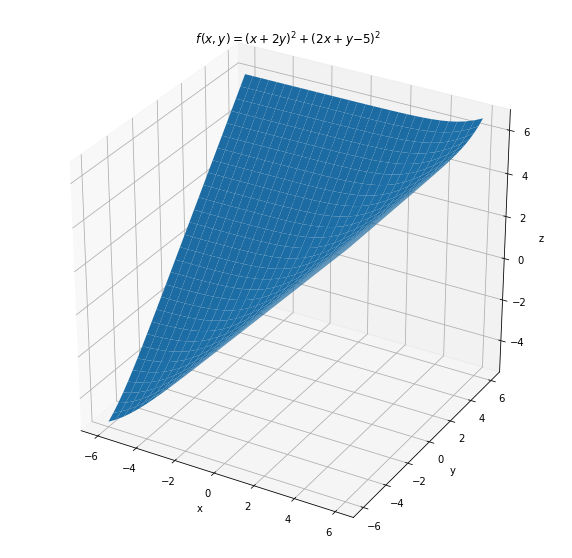

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.set_title(r' $ f(x, y) = (x + 2y)^2 + (2x + y − 5)^2 $');

##2. Derive the partial gradients

f(x, y) = (x + 2y)<sup>2</sup> + (2x + y − 5)<sup>2</sup>

∂Z/∂x = 2(x+2y) + 2(2x+y-5)2 = 2x + 4y + 8x + 4y - 20 = <b>10x + 8y - 20</b></br>
∂Z/∂y = 2(x+2y)2 + 2(2x+y-5) = 4x + 8y + 4x + 2y - 10 = <b>8x + 10y - 10</b>

##3. [3 point] Optimize the function with Gradient Descent. Set the appropriate hyperparameters like initial values of (x,y) and the steplength α through trial and error.


In [ ]:
def func(x,y):
  z = (x + 2*y)**2 + (2*x + y - 5)**2
  return z

In [ ]:
def gradient_x(x,y):
  p = 10*x + 8*y - 20
  return p

In [ ]:
def gradient_y(x,y):
  p = 8*x + 10*y - 10
  return p

In [ ]:
def gradient_update(x,y,alpha):
  x = x - alpha*gradient_x(x,y)
  y = y - alpha*gradient_y(x,y)
  return (x,y)

In [ ]:
df_2 = pd.DataFrame({'itr':[],'x':[],'y':[],'func(x,y)':[],'updated_x':[],'updated_y':[]})
epoch = 1
x = 4
y = -4
alpha = 0.15

while True:
  x_init = x
  y_init = y
  x,y = gradient_update(x,y,alpha)
  df_2.loc[len(df_2.index)]  = [epoch,x_init,y_init,func(x_init,y_init),x,y]
  epoch += 1
  if(func(x_init,y_init)<10**(-6)):
    break
  if(epoch>1000):
    break

df_2

We tried multiple values of x and and alpha but in all of those upper value was giving optimized z in lesser iteration

##4. [1 point] Visualize the trajectory on the same 3D plot. This trajectory should ideally lead to the function minimum. Try to plot the trajectory in a for loop so that the path taken is visible.

In [ ]:
df_2 = pd.DataFrame({'itr':[],'x':[],'y':[],'func(x,y)':[],'updated_x':[],'updated_y':[]})
epoch = 1
x = -6
y = -4
alpha = 0.15

while True:
  x_init = x
  y_init = y
  x,y = gradient_update(x,y,alpha)
  df_2.loc[len(df_2.index)]  = [epoch,x_init,y_init,func(x_init,y_init),x,y]
  epoch += 1
  if(func(x_init,y_init)<10**(-6)):
    break
  if(epoch>1000):
    break

df_2

In [ ]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = (X + 2*Y)**2 + (2*X + Y - 5)**2

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,alpha=0.5)  #alpha = 0.5 to make graph transparent
ax.plot(df_2['x'],df_2['y'],df_2['func(x,y)'],color='r',marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.set_title(r' $ f(x, y) = (x + 2y)^2 + (2x + y − 5)^2 $');

##5. [2 point] Implement the function that controls the step length (stepsize-backtracking from the slides).

In [ ]:
def stepsize_backtracking(mu, x, y, alpha, beta):

  while True:
    x_updated = x - mu*gradient_x(x,y)
    y_updated = y - mu*gradient_y(x,y)
    func_updated = func( x_updated , y_updated )

    grad = np.array([gradient_x(x,y),gradient_y(x,y)])

    if(func_updated < func( x , y ) - alpha*mu*(grad.T@grad)):
      break
    
    mu = beta * mu

  return mu

In [ ]:
df_3 = pd.DataFrame({'itr':[],'x':[],'y':[],'mu':[], 'func(x,y)':[],'updated_x':[],'updated_y':[],'updated_mu':[]})
epoch = 1
x = -6
y = -6
alpha = 0.1
beta = 0.5
mu = 1

while True:
  x_init = x
  y_init = y
  mu_init = mu
  mu = stepsize_backtracking(mu, x, y, alpha, beta)
  x,y = gradient_update(x,y,mu)
  df_3.loc[len(df_3.index)]  = [epoch,x_init,y_init,mu_init,func(x_init,y_init),x,y,mu]
  epoch += 1
  if(func(x_init,y_init)<10**(-6)):
    break
  if(epoch>1000):
    break

df_3

In [ ]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = (X + 2*Y)**2 + (2*X + Y - 5)**2

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,alpha=0.5)
ax.plot(df_3['x'],df_3['y'],df_3['func(x,y)'],color='r',marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.set_title(r' $ f(x, y) = (x + 2y)^2 + (2x + y − 5)^2 $');